# Coherence Cost

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from oc_ica.analysis import evaluate_dgcs
from oc_ica.optimizers.ica_optimizers import sgd, momentum, adam

Using gpu device 0: GeForce GTX 780 (CNMeM is enabled with initial size: 20.0% of memory, cuDNN 5105)


In [2]:
def compute_angles(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    gram = w.dot(w.T)
    gram_off_diag = gram[np.tri(gram.shape[0], k=-1, dtype=bool)]
    return np.arccos(abs(gram_off_diag))/np.pi*180

def gram(w):
    w = w/np.linalg.norm(w, axis=-1, keepdims=True)
    return w.dot(w.T)

In [3]:
kwargs = {}
n_sources = 256
n_mixtures = 128

Overcomplete ICA
Degeneracy control: COHERENCE


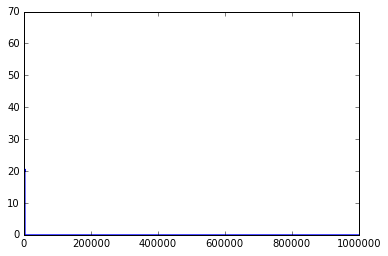

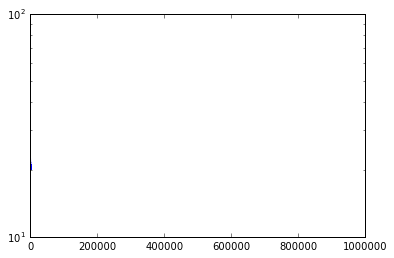

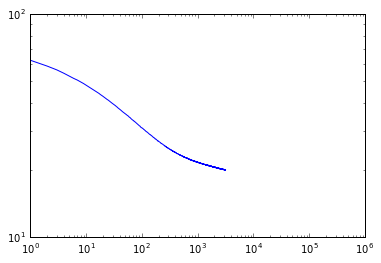

ICA with SGD done!3156
Final loss value: 20.071331024169922
Overcomplete ICA
Degeneracy control: COHERENCE
ICA with L-BFGS-B done!
Final loss value: 19.148916244506836
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.2731693387031555


In [4]:
kwargs['optimizer'] = 'sgd'
kwargs['learning_rule'] = sgd
w, w0 = evaluate_dgcs(['random'], ['COHERENCE'],
                      n_sources=n_sources, n_mixtures=n_mixtures, **kwargs)
w = np.squeeze(w)
w0 = np.squeeze(w0)

kwargs['optimizer'] = 'L-BFGS-B'
kwargs['learning_rule'] = None
wb = np.squeeze(evaluate_dgcs(['random'], ['COHERENCE'],
                              n_sources=n_sources, n_mixtures=n_mixtures, **kwargs)[0])

w4, _ = evaluate_dgcs(['random'], ['L4'],
                      n_sources=n_sources, n_mixtures=n_mixtures)
w4 = np.squeeze(w4)

coherence sgd 85.4064252916
coherence bfgs 85.7099099687
L4 bfgs 85.174627528
original 68.7667031128
coherence sgd 85.4064252916
coherence bfgs 85.7099099687
L4 bfgs 85.174627528
original 68.7667031128


(65, 90)

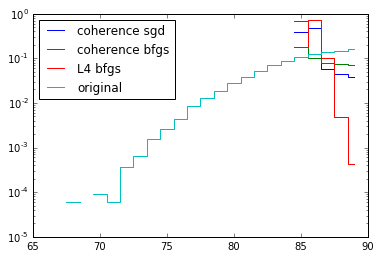

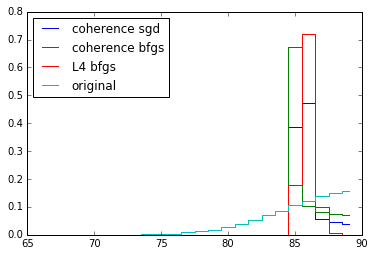

In [5]:
plt.figure()

angles = compute_angles(w)
vals1, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence sgd', angles.min())
plt.semilogy(bins[:-1], vals1, drawstyle='steps-mid', label='coherence sgd')

angles = compute_angles(wb)
vals2, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence bfgs', angles.min())
plt.semilogy(bins[:-1], vals2, drawstyle='steps-mid', label='coherence bfgs')

angles = compute_angles(w4)
vals4, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('L4 bfgs', angles.min())
plt.semilogy(bins[:-1], vals4, drawstyle='steps-mid', label='L4 bfgs')

angles = compute_angles(w0)
vals3, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('original', angles.min())
plt.semilogy(bins[:-1], vals3, drawstyle='steps-mid', label='original')

plt.legend(loc='upper left')
plt.xlim([65, 90])

plt.savefig('no_data_coherence.pdf')

plt.figure()

angles = compute_angles(w)
vals1, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence sgd', angles.min())
plt.plot(bins[:-1], vals1, drawstyle='steps-mid', label='coherence sgd')

angles = compute_angles(wb)
vals2, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('coherence bfgs', angles.min())
plt.plot(bins[:-1], vals2, drawstyle='steps-mid', label='coherence bfgs')

angles = compute_angles(w4)
vals4, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('L4 bfgs', angles.min())
plt.plot(bins[:-1], vals4, drawstyle='steps-mid', label='L4 bfgs')

angles = compute_angles(w0)
vals3, bins = np.histogram(angles, bins=np.arange(0, 91), density=True)
print('original', angles.min())
plt.plot(bins[:-1], vals3, drawstyle='steps-mid', label='original')

plt.legend(loc='upper left')
plt.xlim([65, 90])

In [6]:
sorted(compute_angles(w))

[84.651799138201625,
 84.651927329468151,
 84.652152250763848,
 84.652354756022234,
 84.65244935114157,
 84.652591330622457,
 84.652601163632241,
 84.652613892927278,
 84.652614284082702,
 84.652656011534944,
 84.653138782866407,
 84.653163552024907,
 84.65332291783723,
 84.653433566017156,
 84.653504872869078,
 84.653514002820287,
 84.653595615247994,
 84.653632059836269,
 84.65363334157675,
 84.653844812533876,
 84.654231384238884,
 84.654254805932979,
 84.654316814756669,
 84.654388752577717,
 84.654490279969309,
 84.654624133776665,
 84.654765864963338,
 84.655245631605737,
 84.655675653003598,
 84.655687318885455,
 84.655899547240736,
 84.655969686588278,
 84.656445798141718,
 84.656557872194725,
 84.656614062052341,
 84.656682951270852,
 84.656961328595386,
 84.656986328163825,
 84.657042158685954,
 84.657268335694312,
 84.657304842290642,
 84.657330098092174,
 84.657386405822621,
 84.657460730519318,
 84.657512807847382,
 84.657620528687019,
 84.657697778319999,
 84.657908191059

In [7]:
sorted(compute_angles(wb))

[84.244637976764153,
 84.401586501596427,
 84.645260938867395,
 84.667589547107781,
 84.755444890136971,
 84.770738602008493,
 84.770817419829427,
 84.770832896712207,
 84.770934024306939,
 84.77096621525456,
 84.771089793297321,
 84.771093285582509,
 84.771137277888471,
 84.771150427621038,
 84.771216526942297,
 84.771381428997231,
 84.771389060866881,
 84.771422402381447,
 84.77142987400822,
 84.771524425336494,
 84.771544963055774,
 84.771579453108757,
 84.771735632523061,
 84.771741171554723,
 84.771784244040688,
 84.771918795309332,
 84.77193451875678,
 84.771942442825562,
 84.772408849730581,
 84.772559390771178,
 84.772790632514216,
 84.77292855607304,
 84.772979567550209,
 84.773028844303511,
 84.773039895152962,
 84.773062448635486,
 84.773068086786367,
 84.773112004525416,
 84.773166914805913,
 84.773269993366597,
 84.773309281234773,
 84.773332168037896,
 84.773509889193861,
 84.773517505711339,
 84.773534878546371,
 84.77357585483017,
 84.773590461067556,
 84.77364547592949